In [1]:
%matplotlib notebook

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

# Homework 2: Finite-Difference Approximations

Write a program to compute the first and second derivatives of the function

$$
f(x) = e^{\left(\frac{x}{2\pi}\right)}  \sin{(x)}
$$

using finite-difference approximations. Your program should take as input arguments the order of the finite-difference approximation and the direction of the finite-difference, e.g., centered, forward, backward. Your program must be able to

compute the first-derivative using

- First-order, forward difference, $\delta^{+}_x$

- First-order, backward difference, $\delta^{-}_x$

- Second-order, central difference, $\delta_x$

- At least **two** high-order difference formulae - Use the lecture notes provided to derive and compute the coefficients for the difference formulae of higher than second-order. You can not use the example derived in class for the third-order, backward-biased finite-difference.
    
and, compute the second-derivative using

- Second-order, central difference $\delta_{xx}$

At a minimum, your program must be able to approximate the first derivatives using 5 different difference formulae and approximate second derivatives using the second-order central difference formula. Extensions or generalizations of your program beyond that are welcome, but not required.

Finite-difference formulae can be written as **point** operators or **matrix** operators. Your program should be able to do either. See below for more details.

Consider the domain defined by $0 \le x \le 20$; however, you may need to extend the domain to ensure that all points in the finite-difference stencil are defined within our mesh. In other words, you should carefully discretize the domain so that you do not need any "special" handling near the boundaries.

For example, consider the following discretizations.

In [2]:
# 24 points
x_low = np.linspace(-2.0, 22.0, 25)
print(f'Coarse mesh has spacing : {x_low[1] - x_low[0]}')

# In this case, it would not be hard to find the indices where x = 0 and x = 20, 
# but a more general way to do this is using numpy.where()
#
iLow_start = np.where(x_low >= 0)[0][0]
iLow_stop = np.where(x_low <= 20.0)[0][-1]
print(f'x = {x_low[iLow_start]} located at i = {iLow_start}')
print(f'x = {x_low[iLow_stop]} located at i = {iLow_stop}\n')

# 96 points
x_medium = np.linspace(-2.0, 22.0, 97)
print(f'Base mesh has spacing : {x_medium[1] - x_medium[0]}')

iMedium_start = np.where(x_medium >= 0)[0][0]
iMedium_stop = np.where(x_medium <= 20.0)[0][-1]
print(f'x = {x_medium[iMedium_start]} located at i = {iMedium_start}')
print(f'x = {x_medium[iMedium_stop]} located at i = {iMedium_stop}\n')

# 192 points
x_high = np.linspace(-2.0, 22.0, 193)
print(f'Fine mesh has spacing : {x_high[1] - x_high[0]}')

iHigh_start = np.where(x_high >= 0)[0][0]
iHigh_stop = np.where(x_high <= 20.0)[0][-1]
print(f'x = {x_high[iHigh_start]} located at i = {iHigh_start}')
print(f'x = {x_high[iHigh_stop]} located at i = {iHigh_stop}\n')

Coarse mesh has spacing : 1.0
x = 0.0 located at i = 2
x = 20.0 located at i = 22

Base mesh has spacing : 0.25
x = 0.0 located at i = 8
x = 20.0 located at i = 88

Fine mesh has spacing : 0.125
x = 0.0 located at i = 16
x = 20.0 located at i = 176



Plotting the function $f(x) = e^{\left(\frac{x}{2\pi}\right)}  \sin{(x)}$


<IPython.core.display.Javascript object>


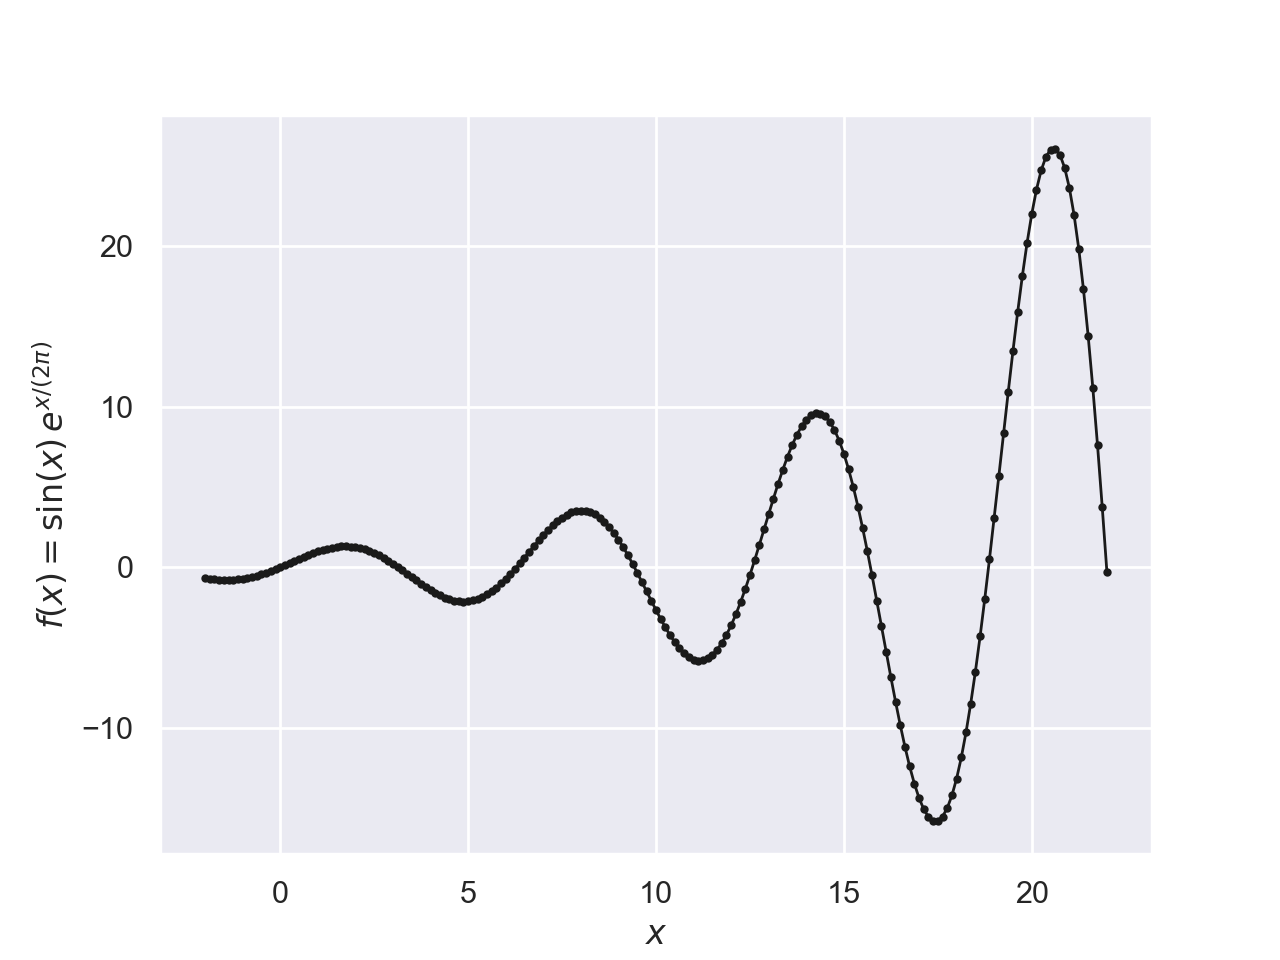

Text(0, 0.5, '$f(x) = \\sin(x) \\,e^{x / (2 \\pi)} $')

In [3]:
f_high = np.exp(x_high / ( 2.0 * np.pi) ) * np.sin(x_high)
    
fig = plt.figure()
ax = fig.add_subplot(111)
line = ax.plot(x_high, f_high, lw=1, c='k', marker='o', ms=2)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x) = \sin(x) \,e^{x / (2 \pi)} $')

## Deriving high-order finite-difference approximations

You **must define and solve the system of equations for the coefficients of the finite-difference formulae to recieve full credit**. There are many references providing tables of these coefficients for various orders and stencils, e.g., [Wikipedia](https://en.wikipedia.org/wiki/Finite_difference_coefficient); though, you certainly can (and probably should) check your solution. 

For example, in class we derived the coefficients for a third-order, backward-biased difference formula using the points $x_{i-2}$, $x_{i-1}$, $x_i$ , and $x_{i+1}$. Using a Taylor series expansion about each point, we were able to determine a system of equations for the coefficients.

In [ ]:
A = np.array([[1, 1, 1, 1], [-2, -1, 0, 1], [4, 1, 0, 1], [-8, -1, 0, 1]])
b = np.array([0, 1, 0, 0])
coeffs = np.linalg.solve(A,b)
print(coeffs)

With the result that
$$
\frac{\delta f}{\delta x}\bigg\rvert_i = \left( \delta^{-}_x f \right)_i = \frac{1}{6 \Delta x} \left(  f_{i-2} - 6 f_{i-1} + 3 f_i + 2 f_{i+1} \right)
$$

## Finite-difference Program

Your program should define a set of functions to compute finite-difference approximations. At a minimum, your functions would take as input arguments the mesh (or equivalent just the values of the function on the stencil) and return the approximated derivated. Functions defined like this compute the finite-difference at a single point.

For example, consider the following program.

In [4]:
def forward_first_v1(u, deltaX):
    """
    A possible implementation for computing the first derivative using 
    a first-order, forward difference formula.
    
    Args:
        u (array-like) - Values of the function on a 1-D uniform mesh
        deltaX (float) - Mesh spacing
    Returns:
        dudx (array-like) - first-derivative of the function u with respect to x.
    """
    # dudx is defined as the same size as u
    dudx = np.zeros_like(u)
    
    # Compute dudx from 0 to the second-to-the last index in the array. The 
    # range should determined by the width of the stencil.
    #
    for i in range(len(u)-1):
        dudx[i] = (u[i+1] - u[i]) / deltaX
        
    # Note: We can't compute dudx at the last index. It is still defined to
    # its initial value of zero.
    return dudx

In [5]:
def forward_first_v2(uR, uL, deltaX):
    """
    Another possible implementation for computing the first derivative using 
    a first-order, forward difference formula.
    
    Args:
        uR (float) - Value of u at the i+1 mesh point
        uL (float) - Value of u at the i mesh point
        deltaX (float) - Mesh spacing
    Returns:
        dudx (float) - First-derivative of the function u with respect to x. 
    """    
    dudx = (uR - uL) / deltaX

In [6]:
def forward_first_v3(u, deltaX):
    """
    Compute the first derivative using a first-order, forward difference formula.
    
    Args:
        u (array-like) - Values of the function on a 1-D uniform mesh
        deltaX (float) - Mesh spacing
    Returns:
        dudx (array-like) - first-derivative of the function u with respect to x.
    """
    # Numpy supports "vectorized" notation. Writing/reading code like this is 
    # difficult at first, but it is the most efficient (and compact) method.
    #
    dfdx = np.zeros_like(u)
    dfdx[:-1] = (u[1:] - u[:-1]) / deltaX
    return dfdx

In addition to your program returning the values of the finite-difference formulae, it should also return the finite-difference matrix operator as a **banded** matrix. For example, let $u$ be a vector function of the mesh points, then

$$
\frac{\textrm{d} \mathbf{u} }{\textrm{d} \mathbf{x} } = \mathcal{D} \mathbf{u}
$$

where the operator, $\mathcal{D}$, is a banded matrix. For example, for the forward, first-order finite-difference formula for the first-derivative, you would define the function for the difference operator as the following.

In [7]:
def forward_first_diffop(N, deltaX):
    """
    Return a banded-matrix for the forward, first-order finite-difference approximation.
    
    Args:
        N (int) : Number of mesh points.
    Returns
        (ab, offsets) : Return a tuple of the diagonal elements plus the offsets. The 
            diagonals contain the non-zero entries of the difference operator, order 
            from the top to bottom diagonals as defined by the offsets array.
    """
    ab = np.ones((2,N)) 
    ab[0] = 1 / deltaX  # u_{i+1} - top diagonal
    ab[1] = -1 / deltaX # u_i - main diagonal
    offsets = np.array([1,0])
    return (ab, offsets)

We can the use the difference operator to compute the finite-difference approximations as a matrix-vector multiply rather than as "loop". 

<IPython.core.display.Javascript object>


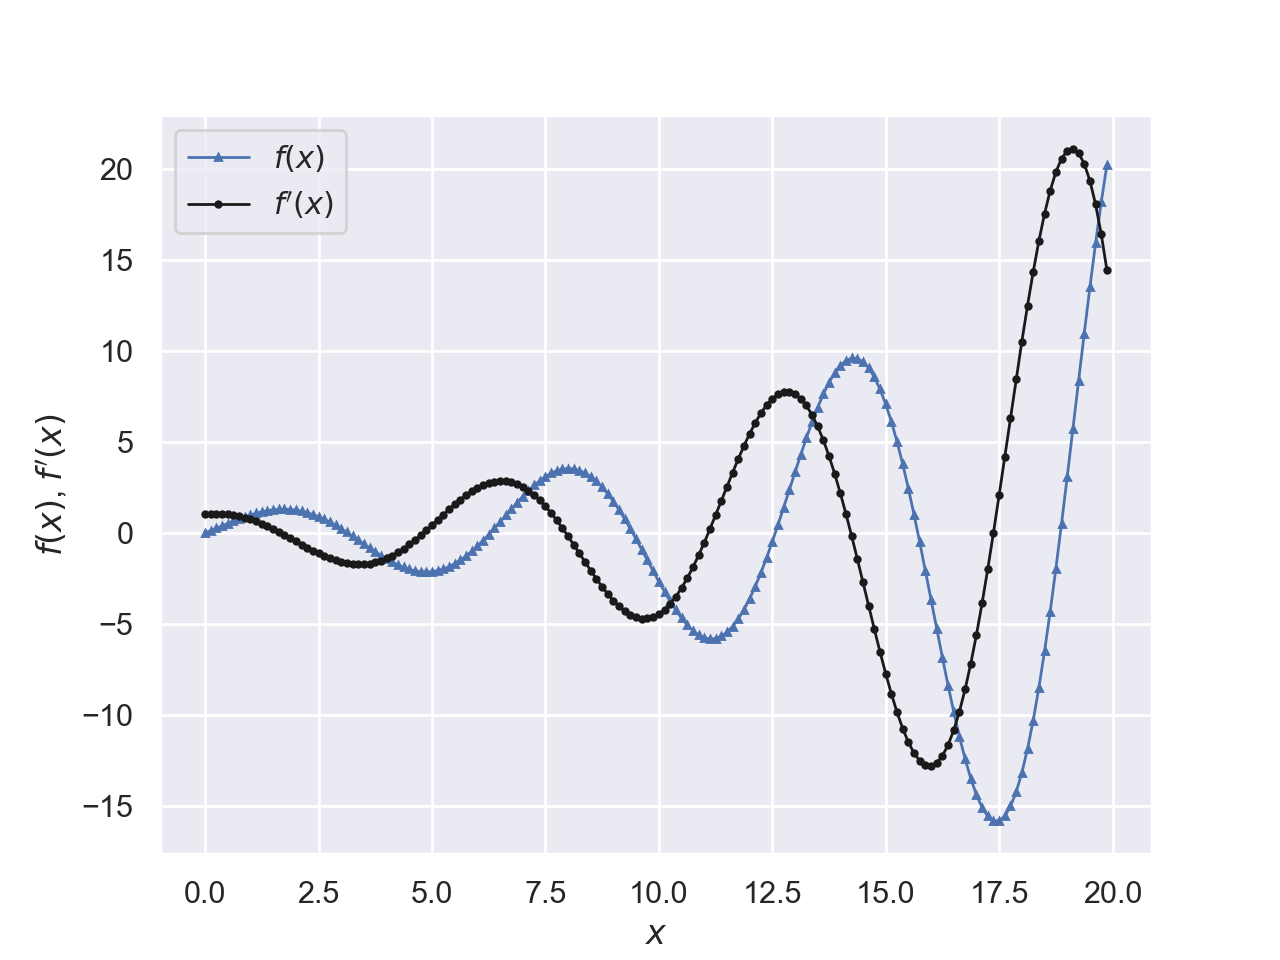

Text(0, 0.5, '$f(x)$, $f^{\\prime}(x)$')

In [8]:
from scipy.sparse import dia_matrix

N = len(x_high)
deltaX = x_high[1] - x_high[0]
D = dia_matrix(forward_first_diffop(N, deltaX), shape=(N, N))

# Compute the finite-difference
dfdx = D * f_high

# Plot the result
fig = plt.figure()
ax = fig.add_subplot(111)

line = ax.plot(x_high[iHigh_start:iHigh_stop], 
               f_high[iHigh_start:iHigh_stop], 
               lw=1, 
               c='b', 
               marker='^', 
               ms=2,
               label=r'$f(x)$')
line = ax.plot(x_high[iHigh_start:iHigh_stop], 
               dfdx[iHigh_start:iHigh_stop], 
               lw=1, 
               c='k',
               marker='o', 
               ms=2, 
               label=r'$f^{\prime}(x)$')

ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$, $f^{\prime}(x)$')

## Testing your program

You must test your finite-difference program. In this exercise, the derivative of the function $f(x) = e^{\left(\frac{x}{2\pi}\right)} \sin{(x)}$ can be determined analytically; however, in practice, this is often not the case. Instead we test programs using input arguments whose outputs give us known solutions. For example, consider the functions, $f(x) = x$ or $f(x) = x^2$. The derivatives of these functions are much easier to compute and visualize graphically.

Please describe how you tested your progrm. Provide any testing routines and results.

## Analyze the results

For each of the finite-difference formulae you have used, compute the mean-squared error of the difference approximations on three difference meshes of increasing refinement, i.e., $N =$ 24, 48, 96. The mean-sqaure error is defined as

$$
MSE(x) = \frac{1}{N} \sum_{i=0}^{N} \left(\frac{\partial f}{\partial x} - \frac{\delta f}{\delta x}\right)^2
$$

Plot the mean-square error as a function of the mesh size for the first-derivative and second-derivative  finite-difference approximations. Discuss the results.  

## Grading Rubric

Your program should have functions that compute the first derivative of a function using 5 difference finite-difference formulae. For each finite-difference formulae, one function should return the approximated values of the derivatives at each point within the mesh defined by the one-dimensional domain $0 \le x \le 20$. Another function should return the banded matrix form of the difference operator. A second pair of functions should return the approximated values of the second derivative as well as the banded matrix form of that difference operator. Each of these functions should be tested using a simplified input function. The results for the first-derivative and second-derivative should be plotted, and you should analyze the trends you observe in the mean-square error of the finite-difference approximations on three difference mesh sizes. 

- Finite-diffrence formula (first derivative) : 50%


- Finite-diffrence formula (second derivative) : 10%


- High-order finite-difference formula (derivation included) : 20%


- Testing : 10%


- Analysis : 10%